## training

In [ ]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Augmentation Pipeline with bbox_params
transform = A.Compose([
    A.Resize(500, 600),
    A.RandomCrop(width=450, height=450),
    A.HorizontalFlip(p=0.8),
    A.HorizontalFlip(p=0.8),
    A.RandomBrightnessContrast(p=0.8),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

In [ ]:
# bounding boxes
%cd /content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/labels
!pwd
txts = !dir
bounding_boxes=[]
for txt in txts:
  temp = open(txt).readlines()[0]
  temp = temp.replace('\n', '')
  temp = temp.split()
  bounding_box = []
  for t in temp:
    bounding_box.append(float(t))
  temp=bounding_box
  bounding_boxes.append(bounding_box)

/content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/labels
/content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/labels


In [ ]:
# images
%cd /content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/images
!pwd
imgs = !dir
images = []
for img in imgs:
  images.append(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))

/content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/images
/content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/images


In [ ]:
for i in range(10):
  for counter in range(0, len(images)):
    transformed = transform(image=images[counter], bboxes=[bounding_boxes[counter][1:]],
                          class_labels=['Cable_drum'])

    transformed_image = transformed['image']  # get the transformed image
    Image.fromarray(transformed_image).save(
        '/content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/images/' + str(i) + 'image' + str(counter) + '.jpeg')

    transformed_bboxes = transformed['bboxes']
    transformed_bboxes = list(*transformed_bboxes)
    transformed_bboxes.insert(0, 0)
    with open('/content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/train/labels/' + str(i) + 'image' + str(counter) + '.txt', 'w') as f:
      f.write(' '.join([str(bboxes) for bboxes in transformed_bboxes]))

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/cabledrum_yolov8
!pwd

/content/drive/MyDrive/cabledrum_yolov8
/content/drive/MyDrive/cabledrum_yolov8


In [ ]:
!unzip -o cabledrums_dataset.zip

Archive:  cabledrums_dataset.zip
   creating: cabledrums_dataset/
  inflating: cabledrums_dataset/classes.txt  
   creating: cabledrums_dataset/train/
   creating: cabledrums_dataset/train/images/
  inflating: cabledrums_dataset/train/images/0cf5e8dd-baraban_04.jpg  
  inflating: cabledrums_dataset/train/images/0db2ef12-drum.jpg  
  inflating: cabledrums_dataset/train/images/1aa35d50-2.jpg  
  inflating: cabledrums_dataset/train/images/1d20696a-jan-6540.jpg  
  inflating: cabledrums_dataset/train/images/287c0829-Super_Power_Pusher_pushing_wooden_flanged_drum_at_TeleFonika_Kable.jpg  
  inflating: cabledrums_dataset/train/images/35f39078-images_3.jpg  
  inflating: cabledrums_dataset/train/images/38e7e5ff-1683653665645a054489af4.jpeg  
  inflating: cabledrums_dataset/train/images/393c0927-6.jpg  
  inflating: cabledrums_dataset/train/images/546db0cd-images_1.jpg  
  inflating: cabledrums_dataset/train/images/59d0e82f-100-1-19-ROTATORS_567x557.webp  
  inflating: cabledrums_dataset/train

In [ ]:
%%writefile cabledrum.yaml
train: train
val: valid
path: /content/drive/MyDrive/cabledrum_yolov8/cabledrums_dataset/

# Classes
names:
  0: 'Cable_drum'  # class names

Overwriting cabledrum.yaml


In [ ]:
from ultralytics import YOLO

In [ ]:
Yolo = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 158MB/s]


In [ ]:
results = Yolo.train(data='/content/drive/MyDrive/cabledrum_yolov8/cabledrum.yaml', epochs=50, imgsz=640)

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/cabledrum_yolov8/cabledrum.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
Yolo = YOLO('/content/drive/MyDrive/cabledrum_yolov8/runs/detect/train4/weights/best.pt')
Yolo.predict('/content/drive/MyDrive/cabledrum_yolov8/runs/detect/testhalf.mp4', save=True)



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1873) /content/drive/MyDrive/cabledrum_yolov8/runs/detect/testhalf.mp4: 384x640 (no detections), 94.3ms
video 1/1 (2/1873) /content/drive/MyDrive/cabledrum_yolov8/runs/detect/testhalf.mp4: 384x640 (no detections), 8.2ms
video 1/1 (3/1873) /content/drive/MyDrive/cabledrum_yolov8/runs/detect/testhalf.mp4: 384x640 (no detections), 5.8ms
video 1/1 (4/1873) /content/drive/MyDrive/cabledrum_yolov8/runs/detect/testhalf.mp4: 384x640 (no detections), 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Cable_drum'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 

## GIT

In [3]:
!git clone https://github.com/dr1nkz/cabledrum_detection/

Cloning into 'cabledrum_detection'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 42 (delta 0), reused 30 (delta 0), pack-reused 0
Receiving objects: 100% (42/42), 14.98 MiB | 24.19 MiB/s, done.


In [4]:
%cd /content/cabledrum_detection

/content/cabledrum_detection


In [33]:
!git config --global user.email "raptorpower1@gmail.com"
!git config --global user.name "dr1nkz"

In [37]:
!git remote set-url origin https://"dr1nkz":""@github.com/"dr1nkz"/cabledrum_detection.git

In [9]:
!git pull

Already up to date.


In [11]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	asdasd.txt

nothing added to commit but untracked files present (use "git add" to track)


In [12]:
!git add -A

In [35]:
!git commit -m "Notebook updated"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [38]:
!git push origin main

To https://github.com/dr1nkz/cabledrum_detection.git
   c3d1a4f..d4ba0db  main -> main


In [6]:
!cp /content/drive/MyDrive/cabledrum_yolov8/cabledrum_yolov8.ipynb /content/cabledrum_detection

## Empty_places

In [1]:
import time
import cv2
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt

In [2]:
class YOLOv8:
    """
    Модель YOLO, преобразованная в onnx формат
    """
    def __init__(self, path, conf_thres=0.7, iou_thres=0.5):
        self.conf_threshold = conf_thres
        self.iou_threshold = iou_thres

        # Инициализация модели
        self.initialize_model(path)

    def __call__(self, image):
        return self.detect_objects(image)

    def initialize_model(self, path):
        """
        Инициализация модели
        
        :param path: путь к модели
        """
        # Основной класс для запуска модели
        self.session = onnxruntime.InferenceSession(path,
                                                    providers=['CUDAExecutionProvider',
                                                               'CPUExecutionProvider'])
        # Получение информации о модели
        self.get_input_details()
        self.get_output_details()

    def detect_objects(self, image):
        """
        Детекция изображения
        
        :param image: np.array - прочитанное изображение в массив
        """
        input_tensor = self.prepare_input(image)

        # Результат предикции
        outputs = self.inference(input_tensor)

        self.boxes, self.scores, self.class_ids = self.process_output(outputs)

        return self.boxes, self.scores, self.class_ids

    def prepare_input(self, image):
        """
        Подготавливает изображение
        
        :param image: np.array - прочитанное изображение в массив
        """
        self.img_height, self.img_width = image.shape[:2]

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Ресайз изображения
        image = cv2.resize(image, (640, 640), interpolation=cv2.INTER_LINEAR)

        # Скалирование изображения
        image = image / 255.0
        image = image.transpose(2, 0, 1)
        input_tensor = image[np.newaxis, :, :, :].astype(np.float32)

        return input_tensor

    def inference(self, input_tensor):
        """
        Инференс модели
        
        :param input_tensor: np.array - подготовленное изображение
        """
        start = time.perf_counter()
        outputs = self.session.run(self.output_names, {self.input_names[0]: input_tensor})

        print(f"Inference time: {(time.perf_counter() - start)*1000:.2f} ms")
        return outputs

    def process_output(self, output):
        """
        Подготовка результатов модели
        """
        predictions = np.squeeze(output[0]).T

        # Фильтрафия оценок, которые ниже уверенности модели
        scores = np.max(predictions[:, 4:], axis=1)
        predictions = predictions[scores > self.conf_threshold, :]
        scores = scores[scores > self.conf_threshold]

        if len(scores) == 0:
            return [], [], []

        # Класс с наибольшей уверенностью
        class_ids = np.argmax(predictions[:, 4:], axis=1)

        # Прямоугольники для каждого предсказания
        boxes = self.extract_boxes(predictions)

        # Применение метода nms
        indices = nms(boxes, scores, self.iou_threshold)

        return boxes[indices], scores[indices], class_ids[indices]

    def extract_boxes(self, predictions):
        """
        Извлечение прямоугольников
        """
        # Прямоугольники
        boxes = predictions[:, :4]
        # Рескалинг под разрешение изображения
        boxes = self.rescale_boxes(boxes)
        # Перевод в формат vol
        boxes = xywh2xyxy(boxes)

        return boxes

    def rescale_boxes(self, boxes):
        """
        Рескейл к исходному разрешению
        """
        input_shape = np.array([self.input_width, self.input_height,
                                self.input_width, self.input_height])
        boxes = np.divide(boxes, input_shape, dtype=np.float32)
        boxes *= np.array([self.img_width, self.img_height, self.img_width, self.img_height])
        return boxes

    def draw_detections(self, image, mask_alpha=0.4):
        """
        Нанесение прямоугольников
        """
        return draw_detections(image, self.boxes, self.scores,
                               self.class_ids, mask_alpha)

    def get_input_details(self):
        """
        Получение информации из входных данных
        """
        model_inputs = self.session.get_inputs()
        self.input_names = [model_inputs[i].name for i in range(len(model_inputs))]

        self.input_shape = model_inputs[0].shape
        self.input_height = self.input_shape[2]
        self.input_width = self.input_shape[3]

    def get_output_details(self):
        """
        Информация о выходных значениях
        """
        model_outputs = self.session.get_outputs()
        self.output_names = [model_outputs[i].name for i in range(len(model_outputs))]


In [3]:
class_names = ['Cable_drum']

rng = np.random.default_rng(3)
colors = rng.uniform(0, 255, size=(len(class_names), 3))


def nms(boxes, scores, iou_threshold):
    """
    Алгоритм nms для удаления дублирующихся рамок
    """
    # Сортировка по значению предсказания
    sorted_indices = np.argsort(scores)[::-1]

    keep_boxes = []
    while sorted_indices.size > 0:
        # Выбор последнего прямоугольника
        box_id = sorted_indices[0]
        keep_boxes.append(box_id)

        # Вычисление метрики по сравнению с остальными
        ious = compute_iou(boxes[box_id, :], boxes[sorted_indices[1:], :])

        # Выбор боксов, у которых метрика не превышает порога
        keep_indices = np.where(ious < iou_threshold)[0]

        sorted_indices = sorted_indices[keep_indices + 1]

    return keep_boxes


def compute_iou(box, boxes):
    """
    Вычисление iou
    """
    # Выбор минимальных/максимальных значений
    xmin = np.maximum(box[0], boxes[:, 0])
    ymin = np.maximum(box[1], boxes[:, 1])
    xmax = np.minimum(box[2], boxes[:, 2])
    ymax = np.minimum(box[3], boxes[:, 3])

    # Вычисление площади пересечения
    intersection_area = np.maximum(0, xmax - xmin) * np.maximum(0, ymax - ymin)

    # Площадь объединения
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    boxes_area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
    union_area = box_area + boxes_area - intersection_area

    # Расчет IoU
    iou = intersection_area / union_area

    return iou


def xywh2xyxy(x):
    """
    конвертация формата рамок
    """
    # Конвертация (x, y, w, h) в (x1, y1, x2, y2)
    # Из yolo формата в VOC
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2
    y[..., 1] = x[..., 1] - x[..., 3] / 2
    y[..., 2] = x[..., 0] + x[..., 2] / 2
    y[..., 3] = x[..., 1] + x[..., 3] / 2
    return y


def draw_detections(image, boxes, scores, class_ids, mask_alpha=0.3):
    """
    Рисует прямоугольники и лейблы
    """
   
    # Прямоугольники
    for box, score, class_id in zip(boxes, scores, class_ids):
        color = colors[class_id]

        x_1, y_1, x_2, y_2 = box.astype(int)

        # Прямоугольник
        cv2.rectangle(image, (x_1, y_1), (x_2, y_2), color, 2)

        # Для отображение лейблов - раскоментить
        label = class_names[class_id]
        caption = f'{label} {int(score * 100)}%'
                
        # font
        font = cv2.FONT_HERSHEY_SIMPLEX
                
        # fontScale
        fontScale = 1
        
        # Line thickness of 2 px
        thickness = 2
        
        # Using cv2.putText() method
        cv2.putText(image, caption, (x_1, y_1 - 4 * thickness),
                    font, fontScale, color, thickness, cv2.LINE_AA)        

    return image

Inference time: 74.78 ms


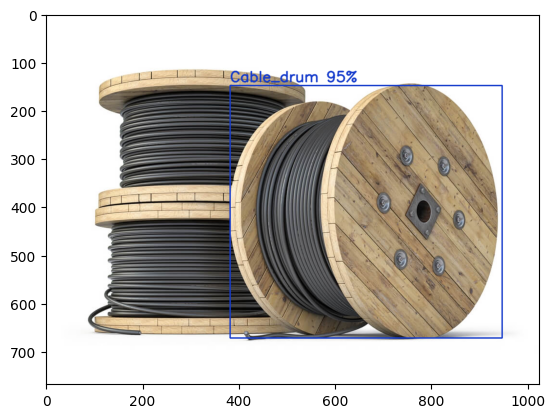

In [26]:
onnx_detect_image(r'C:\ML\cabledrums\cabledrums_dataset\train\images\1aa35d50-2.jpg')

In [4]:
def onnx_detect_image(image_path):
    """
    Запуск модели
    """
    model_path = r'train4\weights\best.onnx'
    yolov8_detector = YOLOv8(path=model_path,
                             conf_thres=0.3,
                             iou_thres=0.5)

    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    
    yolov8_detector(img)
    combined_img = yolov8_detector.draw_detections(img)
    # cv2.namedWindow("Output", cv2.WINDOW_NORMAL)
    # cv2.imshow("Output", combined_img)
    plt.imshow(combined_img)
    # cv2.waitKey(0)


def onnx_detect_video():
    """
    Запуск модели
    """
    # Захват видео с камеры
    cap = cv2.VideoCapture(0)

    model_path = r'train4\weights\best.onnx'
    yolov8_detector = YOLOv8(path=model_path,
                             conf_thres=0.3,
                             iou_thres=0.5)

    cv2.namedWindow("Detected Objects", cv2.WINDOW_NORMAL)
    
    while cap.isOpened():

        # Кадр с камеры
        ret, frame = cap.read()

        if not ret:
            break

        # Детектирование
        yolov8_detector(frame)
        combined_img = yolov8_detector.draw_detections(frame)
        
        cv2.imshow("Detected Objects", combined_img)
        # plt.imshow(combined_img)
        
        # Для выхода нажать q
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

In [27]:
onnx_detect_video()

Inference time: 82.72 ms
Inference time: 74.01 ms
Inference time: 66.44 ms
Inference time: 86.57 ms
Inference time: 68.47 ms
Inference time: 73.04 ms
Inference time: 68.78 ms
Inference time: 56.36 ms
Inference time: 72.37 ms
Inference time: 62.64 ms
Inference time: 68.97 ms
Inference time: 72.58 ms
Inference time: 70.59 ms
Inference time: 61.42 ms
Inference time: 65.92 ms
Inference time: 56.88 ms
Inference time: 71.04 ms
Inference time: 67.55 ms
Inference time: 55.99 ms
Inference time: 73.08 ms
Inference time: 71.74 ms
Inference time: 55.41 ms
Inference time: 58.25 ms
Inference time: 72.48 ms
Inference time: 68.00 ms
Inference time: 53.79 ms
Inference time: 71.48 ms
Inference time: 65.23 ms
Inference time: 59.26 ms
Inference time: 74.95 ms
Inference time: 60.51 ms
Inference time: 60.02 ms
Inference time: 62.70 ms
Inference time: 71.44 ms
Inference time: 69.65 ms
Inference time: 62.93 ms
Inference time: 69.61 ms
Inference time: 71.94 ms
Inference time: 71.24 ms
Inference time: 71.42 ms


In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
cap = cv2.VideoCapture(0)

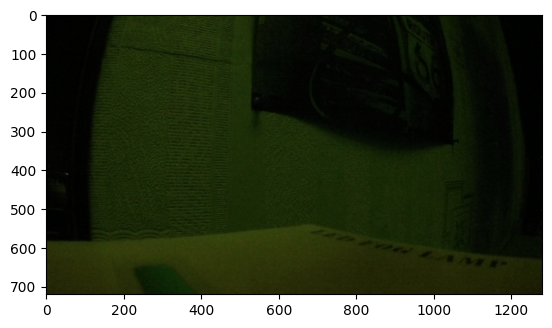

In [16]:
ret, frame = cap.read()

cv2.imshow('window_name', frame)
cv2.waitKey(0)
# closing all open windows
cv2.destroyAllWindows()

plt.imshow(frame)

Inference time: 85.05 ms


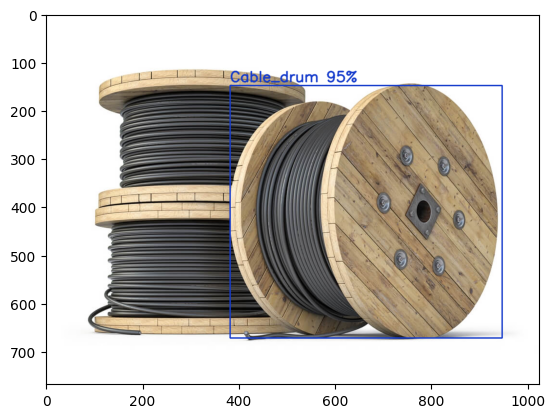

In [15]:
onnx_detect_image(r'C:\ML\cabledrums\cabledrums_dataset\train\images\1aa35d50-2.jpg')